# TP n°2: Identification des paramètres du modèle de fermentation

## Identification des paramètres $k_1$ et $k_2$

On remarque, en batch, on a:
$$\frac{dS}{dt}+k_2\frac{dE}{dt}=0 \Longleftrightarrow S(t)+k_2E(t)=S(0)+k_2E(0)= \text{constante}$$
$$\frac{dN}{dt}+k_1\frac{dX}{dt}=0 \Longleftrightarrow N(t)+k_1X(t)=N(0)+k_1X(0)=\text{constante}$$

On peut donc identifier $k_1$ et $k_2$ simplement en recherchant une relation linéaire entre $N$ et $X$ et entre $E$ et $S$.


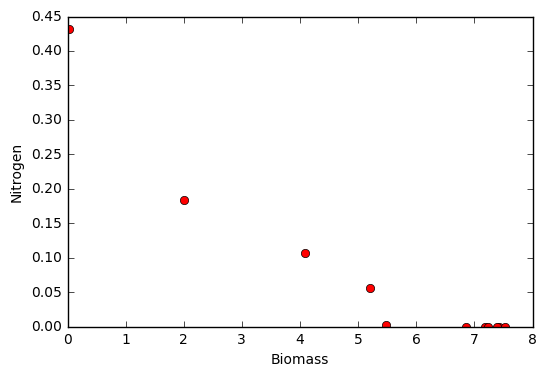

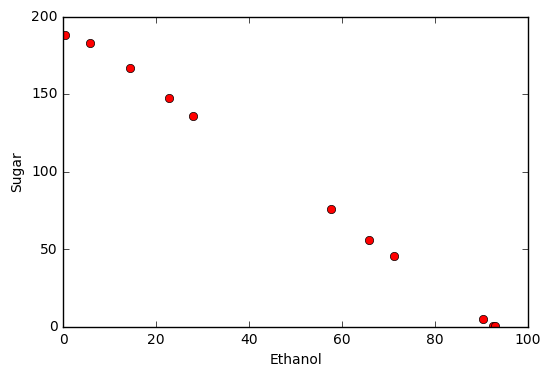

In [3]:
import numpy as np # module numpy: vecteur, matrices, instructions vectorisees
#import scipy as sc # module scipy: librairies scientifiques
import matplotlib.pyplot as plt # module matplotlib: librairie graphique
import scipy.integrate as scint
import scipy.optimize as scop
import os

plt.close('all') # close all figure
    
Data = np.loadtxt('data/batch.txt')
Datatime = Data[:,0] #time
DataB2 = Data[:,1] # biomass in 10^6 cell/mL
DataB = Data[:,6] # biomass in g/L
DataN = Data[:,2]/1000 # nitrogen
DataE = Data[:,3] # ethanol
DataS = Data[:,4] # sugar
DataCO2 = Data[:,5]/100 # CO2 production rate

t0 = Datatime[0]  # initial time
tf = Datatime[-1]  # final time

plt.figure(1)
plt.plot(DataB,DataN,'ro')
plt.xlabel('Biomass')
plt.ylabel('Nitrogen')

plt.figure(2)
plt.plot(DataE,DataS,'ro')
plt.xlabel('Ethanol')
plt.ylabel('Sugar')

plt.show()

estimated k1= 0.0500698795862
estimated k2= 2.08478746133


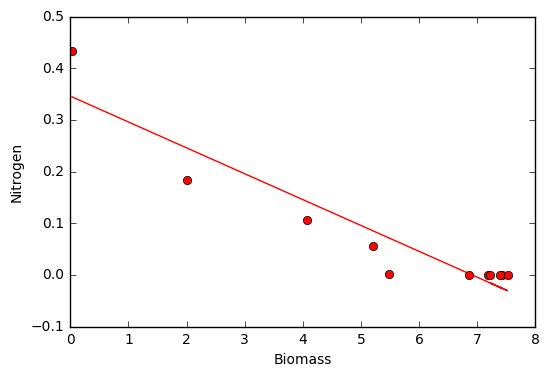

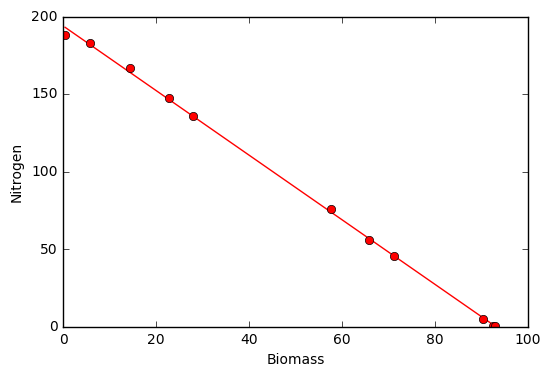

In [4]:
def err(p,x,y):
    return p[0]*x+p[1]-y
    
# identification of k1
p0 = np.array([0,DataN[0]])
ps = scop.leastsq(err,p0,args=(DataB,DataN))
ps = ps[0]
k1_est = -ps[0]
print('estimated k1=',k1_est)

plt.figure(1)
plt.plot(DataB,-k1_est*DataB+ps[1],'r')
plt.plot(DataB,DataN,'ro')
plt.xlabel('Biomass')
plt.ylabel('Nitrogen')

# identification of k2
p0 = np.array([0,DataS[0]])
ps = scop.leastsq(err,p0,args=(DataE,DataS))
ps = ps[0]
k2_est = -ps[0]
print('estimated k2=',k2_est)

plt.figure(2)
plt.plot(DataE,-k2_est*DataE+ps[1],'r')
plt.plot(DataE,DataS,'ro')
plt.xlabel('Biomass')
plt.ylabel('Nitrogen')

plt.show()

## Identification des autres paramètres du modèle avec les moindres carrés


 final_simplex: (array([[  3.74944719e-02,   2.28293149e+00,   1.34690984e+00,
          1.54023162e+00,   1.22501923e+00,   9.06968208e+00,
          2.16837371e-02,   5.86724054e-02,   2.75054766e-01,
          4.25706114e-01,   2.08462734e+02],
       [  3.74944770e-02,   2.28293413e+00,   1.34691141e+00,
          1.54022894e+00,   1.22502004e+00,   9.06969417e+00,
          2.16837339e-02,   5.86722865e-02,   2.75054816e-01,
          4.25706197e-01,   2.08462859e+02],
       [  3.74945746e-02,   2.28293177e+00,   1.34691056e+00,
          1.54023235e+00,   1.22502066e+00,   9.06969221e+00,
          2.16837017e-02,   5.86723447e-02,   2.75054865e-01,
          4.25705680e-01,   2.08462737e+02],
       [  3.74944592e-02,   2.28293114e+00,   1.34690966e+00,
          1.54023218e+00,   1.22501894e+00,   9.06968180e+00,
          2.16837381e-02,   5.86724269e-02,   2.75054729e-01,
          4.25706041e-01,   2.08462792e+02],
       [  3.74945882e-02,   2.28293605e+00,   1.34691327e+0

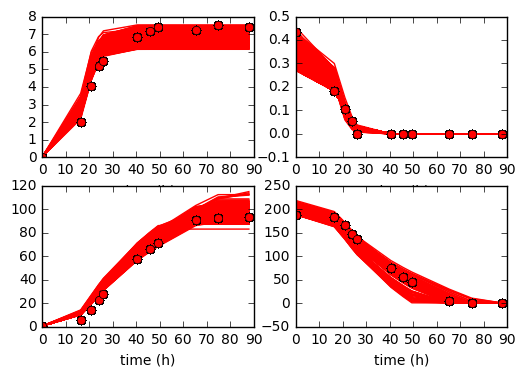

k1 = 0.0374944718592
k2 = 2.28293149338
mu1max = 1.34690983659
mu2max = 1.54023162133
KN = 1.22501923287
KE = 9.06968208073
KS = 0.0216837371425
B0 = 0.058672405438
N0 = 0.27505476579
E0 = 0.425706113952
S0 = 208.46273435


In [5]:
# model of the the fermenter
def fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS):
    B = x[0] #biomass
    N = x[1] # nitrogen
    E = x[2] # ethanol
    S = x[3] # sugar
    
    dx = np.zeros(4) #derivative of B, N, E and S
    mu1 = mu1max*N/(KN+N)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)

    dx[0] = mu1*B
    dx[1] = -k1*mu1*B
    dx[2] = mu2*B
    dx[3] = -k2*mu2*B
    return dx

# identification of other pmodel parameters 
def err2(p,color_plot,cas,k2_est):
    
    # parameters of the model
    
    if cas == 1:
        k1 = p[0]
        k2 = p[1]
        mu1max = p[2]
        mu2max = p[3]
        KN = p[4]
        KE = p[5]
        KS = p[6]
        # initial conditions
        x0 = p[7:]
    elif cas == 2:
        k1 = p[0]
        k2 = k2_est
        mu1max = p[1]
        mu2max = p[2]
        KN = p[3]
        KE = p[4]
        KS = p[5]
        # initial conditions
        x0 = p[6:]

    # time vector
    t = Datatime

    # integration numerique de l'EDO
    y = scint.odeint(fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))
    
    ax[0,0].plot(t,y[:,0],color=color_plot)
    ax[0,0].plot(Datatime,DataB,'ro')
    ax[0,0].set_xlabel('time (h)')
    
    ax[0,1].plot(t,y[:,1],color=color_plot)
    ax[0,1].plot(Datatime,DataN,'ro')
    ax[0,1].set_xlabel('time (h)')
    
    ax[1,0].plot(t,y[:,2],color=color_plot)
    ax[1,0].plot(Datatime,DataE,'ro')
    ax[1,0].set_xlabel('time (h)')
    
    ax[1,1].plot(t,y[:,3],color=color_plot)
    ax[1,1].plot(Datatime,DataS,'ro')
    ax[1,1].set_xlabel('time (h)')
    
    f2min=np.zeros(4)
    # biomass
    ftemp1 = abs(y[:,0]-DataB)
    ftemp2 = abs(DataB) 
    f2min[0] = sum((Datatime[2:]-Datatime[1:-1])*(ftemp1[2:]+ftemp1[1:-1])/2) \
    /sum((Datatime[2:]-Datatime[1:-1])*(ftemp2[2:]+ftemp2[1:-1])/2)
    
    # Nitrogen
    ftemp1 = abs(y[:,1]-DataN)
    ftemp2 = abs(DataN) 
    f2min[1] = sum((Datatime[2:]-Datatime[1:-1])*(ftemp1[2:]+ftemp1[1:-1])/2) \
    /sum((Datatime[2:]-Datatime[1:-1])*(ftemp2[2:]+ftemp2[1:-1])/2)
    
    # Ethanol
    ftemp1 = abs(y[:,2]-DataE)
    ftemp2 = abs(DataE) 
    f2min[2] = sum((Datatime[2:]-Datatime[1:-1])*(ftemp1[2:]+ftemp1[1:-1])/2) \
    /sum((Datatime[2:]-Datatime[1:-1])*(ftemp2[2:]+ftemp2[1:-1])/2)
    
    # Sugar
    ftemp1 = abs(y[:,3]-DataS)
    ftemp2 = abs(DataS) 
    f2min[3] = sum((Datatime[2:]-Datatime[1:-1])*(ftemp1[2:]+ftemp1[1:-1])/2) \
    /sum((Datatime[2:]-Datatime[1:-1])*(ftemp2[2:]+ftemp2[1:-1])/2)
    
    f2min = sum(f2min)
    return f2min


k1 = 0.0606 # -
k2 = 2.17 # -
mu1max = 1.34 # 1/h
mu2max = 1.45 # 1/h
KN = 1.57 # g/L
KE = 14.1 # g/L
KS = 0.0154 # g/L
x0 = np.array([DataB[0], DataN[0], DataE[0], DataS[0]])

# identification of the parameters and initial conditions
# -------------------------------------------------------
# Identification 1: all parameters
# ---------------------------------
p0 = np.array([k1,k2,mu1max,mu2max,KN,KE,KS,DataB[0],DataN[0],DataE[0],DataS[0]])
f, ax = plt.subplots(2,2)
color_plot='r'
cas = 1
# attention, si un seul argument, par exemple color_plot, alors il faut mettre
# args=(color_plot,) avec une virgule avant la parenthese pour dire que c'est 
# un tuple ...
ps1 = scop.minimize(err2,p0,args=(color_plot,cas,k2_est),method='Nelder-Mead')#,options={"maxiter":14})
print(ps1)
plt.show()

print('k1 =',ps1.x[0])
print('k2 =',ps1.x[1])
print('mu1max =',ps1.x[2])
print('mu2max =',ps1.x[3])
print('KN =',ps1.x[4])
print('KE =',ps1.x[5])
print('KS =',ps1.x[6])
print('B0 =',ps1.x[7])
print('N0 =',ps1.x[8])
print('E0 =',ps1.x[9])
print('S0 =',ps1.x[10])

[  -2.08478746  193.90767251]


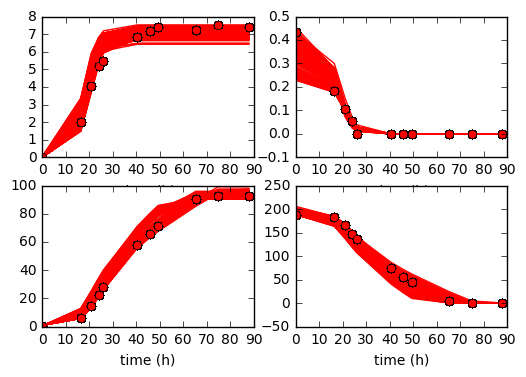

k1 = 0.0330504558059
mu1max = 2.17663865387
mu2max = 1.04157034306
KN = 1.46168826662
KE = 16.2681813123
KS = 0.0188823206421
B0 = 0.013818710764
N0 = 0.238376940633
E0 = 0.903632480482
S0 = 191.731640009


In [6]:

# Identification 2: all parameters except k2 which takes value k2_est
# -------------------------------------------------------------------
p0 = np.array([k1,mu1max,mu2max,KN,KE,KS,DataB[0],DataN[0],DataE[0],DataS[0]])
f, ax = plt.subplots(2,2)
color_plot='r'
cas = 2
# attention, si un seul argument, par exemple color_plot, alors il faut mettre
# args=(color_plot,) avec une virgule avant la parenthese pour dire que c'est 
# un tuple ...
ps2 = scop.minimize(err2,p0,args=(color_plot,cas,k2_est),method='Nelder-Mead')#,options={"maxiter":14})
print(ps)
plt.show()

print('k1 =',ps2.x[0])
print('mu1max =',ps2.x[1])
print('mu2max =',ps2.x[2])
print('KN =',ps2.x[3])
print('KE =',ps2.x[4])
print('KS =',ps2.x[5])
print('B0 =',ps2.x[6])
print('N0 =',ps2.x[7])
print('E0 =',ps2.x[8])
print('S0 =',ps2.x[9])


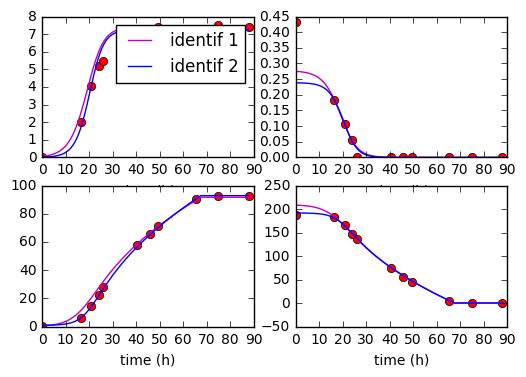

In [7]:
# Simulation with identified parameters  
f2, ax2 = plt.subplots(2,2)
ax2[0,0].plot(Datatime,DataB,'ro')
ax2[0,0].set_xlabel('time (h)')
ax2[0,1].plot(Datatime,DataN,'ro')
ax2[0,1].set_xlabel('time (h)')
ax2[1,0].plot(Datatime,DataE,'ro')
ax2[1,0].set_xlabel('time (h)')
ax2[1,1].plot(Datatime,DataS,'ro')
ax2[1,1].set_xlabel('time (h)')

k1 = ps1.x[0]
k2 = ps1.x[1]
mu1max = ps1.x[2]
mu2max = ps1.x[3]
KN = ps1.x[4]
KE = ps1.x[5]
KS = ps1.x[6]
x0 = ps1.x[7:]

# time vector
t = np.arange(t0,tf,0.1)

# integration numerique de l'EDO
y = scint.odeint(fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))
color_plot='m'
ax2[0,0].plot(t,y[:,0],color=color_plot,label='identif 1')
ax2[0,1].plot(t,y[:,1],color=color_plot)
ax2[1,0].plot(t,y[:,2],color=color_plot) 
ax2[1,1].plot(t,y[:,3],color=color_plot)

k1 = ps2.x[0]
k2 = k2_est
mu1max = ps2.x[1]
mu2max = ps2.x[2]
KN = ps2.x[3]
KE = ps2.x[4]
KS = ps2.x[5]
# initial conditions
x0 = ps2.x[6:]

# integration numerique de l'EDO
y = scint.odeint(fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))
color_plot='b'
ax2[0,0].plot(t,y[:,0],color=color_plot,label='identif 2')
ax2[0,1].plot(t,y[:,1],color=color_plot)
ax2[1,0].plot(t,y[:,2],color=color_plot) 
ax2[1,1].plot(t,y[:,3],color=color_plot)
ax2[0,0].legend()

plt.show()
    

## Filtre de Kalman étendu continu-discret
Le modèle du fermenteur continu s'écrit sous la forme:
$$ \dot{\xi}=f(\xi,u) \text{ avec }
\xi=\left[
\begin{array}{l}
B \\
N \\
E \\
S
\end{array}%
\right],\,\,\,\,\,\,\,
u=Q_{in},\,\text{ et }
 f(\xi,u)=\left[
\begin{array}{c}
\mu_1(N)X -DX\\
-k_1\mu_1(N)X+D(N_0-N)  \\
\mu_2(E,S)X -DE \\
-k_2\mu_2(E,S)X+D(S_0-S) 
\end{array}
\right].
$$

A ce modèle on ajoute une equation en temps discret de mesure. On suppose en effet que toutes les $20$ minutes on obtient une mesure de la vitesse de dégagement du $CO_2$ qui correspond à la quantité $\mu_2(E,S)X$ dans le modèle.
On a donc:
$$ y^k=h(\xi^k)+\eta^k$$
avec:
$$ h(\xi)=\mu_2(E,S)X$$
$\eta^k$ étant un bruit de mesure, dont on suppose la loi gaussienne:
$$ \eta^k  \sim  \mathcal{N}(0,\sigma^2)$$

On suppose aussi que le modèle n'est pas parfait et on rajoute donc un bruit $\omega$ au modèle de la manière suivante:
$$ \dot{\xi}=f(\xi,u)+\omega$$
$\omega$ est un bruit gaussien de moyenne nulle et de matrice de covariances $Q$.

L'application du filtre de Kalman étendu à ce modèle est expliqué ci-dessous:

1. initialisation de $\hat{\xi}_0^{+}$ et $P_0^{+}$;

2. pour tout $k$, mise à jour des valeurs $\hat{\xi}_k^{-}$ et $P_k^{-}$ qui sont les estimations de $\hat{\xi}(t_{k})$ et $P(t_{k})$,  obtenues par simulation des équations:
    $$ \left\{
    \begin{array}{l}
    \dot{\hat{\xi}}=f(\hat{\xi},u),\\
    \hat{\xi}(t_{k-1})=\hat{\xi}_{k-1}^{+}, \text{   (conditions initiales)}
    \end{array}
    \right. $$
    et
    $$
    \left\{
    \begin{array}{l}
    \dot{P}=F(\hat{\xi})P+PF^{T}(\hat{\xi})+Q,\\
    P(t_{k-1})=P_{k-1}^{+},\text{   (conditions initiales)}
    \end{array}
    \right.
    $$
    où:
     $$F(\hat{\xi})=\frac{\partial f}{\partial \xi}_{\left| \hat{\xi}\right.}$$ est donnée dans notre case par:
     $$
     F(\xi)=\left[
    \begin{array}{cccc}
    \mu_1(N)-D & \mu_1^\prime(N)X & 0 & 0\\
    -k_1\mu_1(N) & -k_1\mu_1^\prime(N)X-D & 0 & 0\\
    \mu_2(E,S) & 0 & \partial_1 \mu_2(E,S)X-D & \partial_2 \mu_2(E,S) X \\
    -k_2 \mu_2(E,S) & 0 & -k_2 \partial_1 \mu_2(E,S) X & -k_2 \partial_2 \mu_2(E,S) X-D
    \end{array}
    \right]
    $$
    avec:
    \begin{eqnarray}
    \mu_1^\prime(N) &=& \mu_1^{max}\frac{K_N}{(K_N+N)^2}\\
    \partial_1 \mu_2(E,S)&=& -\mu_2^{max}\frac{S}{K_S+S}\frac{K_E}{(K_E+E)^2}<0\\
    \partial_2 \mu_2(E,S)&=&\mu_2^{max}\frac{K_S}{(K_S+S)^2}\frac{K_E}{K_E+E}>0.
    \end{eqnarray}


3. pour tout $k$ mise à jour des valeurs $\hat{X}_k^+$ et $P_k^+$ de la façon suivante:
    \begin{eqnarray}
    \hat{\xi}_k^+&=&\hat{\xi}_k^{-}+K_k(y^k-h(\hat{\xi}_k^-)),\\
    P_k^+&=&P_k^{-}-K_k H_k(\hat{\xi}_k^-)P_k^-,
    \end{eqnarray}
    où:
    $$
    H_k(\hat{\xi}_k^-)=\frac{\partial h}{\partial \xi}_{\left| \hat{\xi}_k^-\right.}\text{ avec }\frac{\partial h}{\partial \xi}=
    \left[
    \begin{array}{ccccc}
    \mu_2(E,S) & 0 &  \partial_1 \mu_2(E,S) X & \partial_2 \mu_2(E,S) X
    \end{array}
    \right]$$
    et $H_k$ est la matrice de Kalman donnée par:
    $$K_k=P_k^- H_k^T(\hat{\xi}_k^-)\left[ H_k(\hat{\xi}_k^-) P_k^- H_k^T(\hat{\xi}_k^-)+\sigma^2\right]^{-1}.
    $$


--> ca ne marche pas. C'est comme si il n'y avait aucune correction, même quand j'augmente les éléments de la matrice de covariance Q ce qui devrait signaler que je ne fais pas trop cofiance au modèle par rapport aux mesures...
Je sèche là....


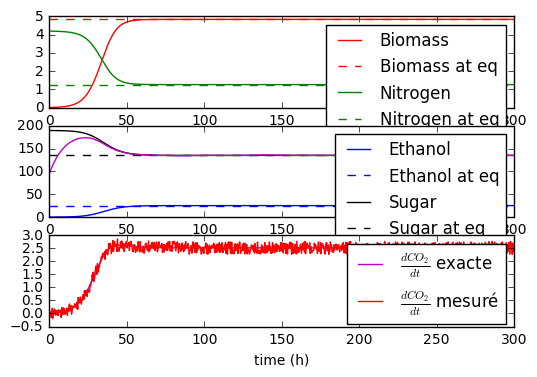

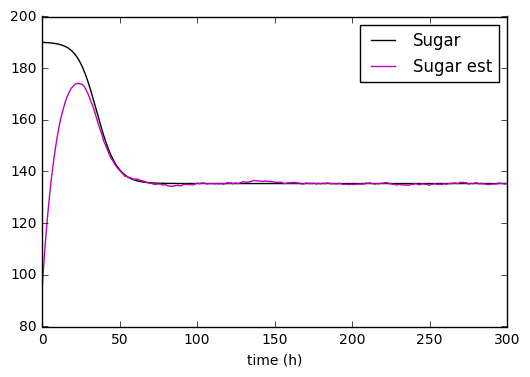

In [8]:
import numpy as np # module numpy: vecteur, matrices, instructions vectorisees
import matplotlib.pyplot as plt # module matplotlib: librairie graphique
import scipy.integrate as scint
import scipy.optimize as scop

plt.close('all') # close all figure

# model of the the fermenter
def cont_fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,N0,S0):
    B = x[0] #biomass
    N = x[1] # nitrogen
    E = x[2] # ethanol
    S = x[3] # sugar
    
    dx = np.zeros(4) #derivative of B, N, E and S
    mu1 = mu1max*N/(KN+N)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    dx[0] = mu1*B-Qin/V*B
    dx[1] = -k1*mu1*B+Qin/V*(N0-N)
    dx[2] = mu2*B-Qin/V*E
    dx[3] = -k2*mu2*B+Qin/V*(S0-S)
    return dx
    
# parameter of the model
k1 = 0.0606 # -
k2 = 2.17 # -
mu1max = 1.34 # 1/h
mu2max = 1.45 # 1/h
KN = 1.57 # g/L
KE = 14.1 # g/L
KS = 0.0154 # g/L
S0 = 190
N0 = 0.42
Qin = 0.05
V = 0.5
D=Qin/V

# initial conditions
x0 = np.array([0.01, N0, 0, S0])

tmax = 300
pasmes =1/3

fact_passimu = 100
# time vector
t = np.arange(0,tmax,pasmes/fact_passimu)

# integration numerique de l'EDO
y = scint.odeint(cont_fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,N0,S0))

# computation of the equilibrium points
def abseqG(S,Qin,k1,k2,mu1max,mu2max,KN,KE,KS,V,N0,S0):
    return np.abs(Qin*(S0-S)/(k2*V)-mu2max*S/(S+KS)*k2*KE/(k2*KE+S0-S)*1/k1 \
    *(N0-Qin*KN/(V*mu1max-Qin)))

S_0=S0/2
ps = scop.minimize(abseqG,S_0,args=(Qin,k1,k2,mu1max,mu2max,KN,KE,KS,V,N0,S0),method='Nelder-Mead')#,options={"maxiter":14})
Seq = ps.x
Eeq = (S0-Seq)/k2
Neq = np.array(Qin*KN/(V*mu1max-Qin))
Beq = np.array((N0-Neq)/k1)

# mesures
CO2 = mu2max*y[:,3]/(KS+y[:,3])*KE/(KE+y[:,2])*y[:,0]
ind = np.arange(fact_passimu,len(t),fact_passimu)
CO2mes = CO2[ind]+0.5*(np.random.rand(len(ind))-0.5)

# Filtre de Kalman
hkalman=pasmes/fact_passimu

tcurr = 0
XhatPlus = np.array([[0.01, N0/2, 0, S0/2]])
PhatPlus = np.array([[0, 0, 0, 0], \
[0, 100, 0, 0], \
[0, 0, 0, 0], \
[0, 0, 0, 10000]])

covQ = 100*np.eye(4)
Rk = 0.1
ind = 0
while tcurr<t[-1]-pasmes:
#for t in np.arange(2):
    
    Xhat=XhatPlus[-1,:]
    Phat=PhatPlus

    k = 0
    while k<=pasmes:
    
        Xhat=Xhat+hkalman*cont_fermenter(Xhat,t,k1,k2,mu1max,mu2max,KN,KE,KS,Qin,V,N0,S0)
        
        # Calcul de la matrice F qui est la jacobienn de cont_fermenter en Xhat
        # mu_1 en Xhat
        mu1 = mu1max*Xhat[1]/(KN+Xhat[1])
        # mu_2 en Xhat
        mu2 = mu2max*Xhat[3]/(KS+Xhat[3])*KE/(KE+Xhat[2])
        # dérivée de mu_1 par rapport à N en Xhat
        mu1prime = mu1max*KN/((KN+Xhat[1])**2)
        # dérivée de mu_2 par rapport à E en Xhat
        dmu2dE = mu2*(-1)/(KE+Xhat[2])
        # dérivée de mu_2 par rapport à S en Xhat
        dmu2dS = mu2max*KS/((KS+Xhat[3])**2)*KE/(KE+Xhat[2])
            
        F=np.array([[mu1-D, mu1prime*Xhat[0], 0, 0], \
        [-k1*mu1, -k1*mu1prime*Xhat[0]-D, 0, 0], \
        [mu2, 0,  dmu2dE*Xhat[0]-D, dmu2dS*Xhat[0]], \
        [-k2*mu2, 0,  -k2*dmu2dE*Xhat[0], -k2*dmu2dS*Xhat[0]-D]])
        
        Phat=Phat+hkalman*(np.dot(F,Phat)+np.dot(Phat,F.T)+covQ)
        
        k = k+hkalman        
    
    PhatMoins=Phat

    mu2 = mu2max*Xhat[3]/(KS+Xhat[3])*KE/(KE+Xhat[2])
    dmu2dE = mu2*(-1)/(KE+Xhat[2])
    dmu2dS = mu2max*KS/((KS+Xhat[3])**2)*KE/(KE+Xhat[2])

    # si on mesure mu2(E,S)X    
    Hk = np.array([[mu2, 0, dmu2dE*Xhat[0], dmu2dS*Xhat[0]]])    
    c = CO2mes[ind]
    #c = mu2max*y[(ind+1)*fact_passimu,3]/(KS+y[(ind+1)*fact_passimu,3])*KE/(KE+y[(ind+1)*fact_passimu,2])*y[(ind+1)*fact_passimu,0]
    cMoins=mu2*Xhat[0]
    
#    # si on mesure S
#    Hk = np.array([[0, 0, 0, 1]])
#    c = y[(ind+1)*fact_passimu,3]+5*(np.random.rand(1)-0.5)
#    c=c[0]
#    cMoins=Xhat[3]

    matM = np.linalg.inv(np.dot(np.dot(Hk,PhatMoins),Hk.T)+Rk)
    Kk=np.dot(np.dot(PhatMoins,Hk.T),matM)

    XhatPlus=np.vstack((XhatPlus, Xhat+np.dot(Kk.T,c-cMoins)))
    PhatPlus = PhatMoins-np.dot(np.dot(Kk,Hk),PhatMoins)
    tcurr = tcurr + pasmes
    ind = ind +1
    #input(" ")

f2, ax2 = plt.subplots(3,1)

ax2[0].plot(t,y[:,0],'r',label='Biomass')
ax2[0].plot([t[0],t[-1]],Beq*[1,1],'r--',label='Biomass at eq')
ax2[0].plot(t,y[:,1]*10,'g',label='Nitrogen')
ax2[0].plot([t[0],t[-1]],Neq*[10,10],'g--',label='Nitrogen at eq')
ax2[0].legend()
ax2[0].set_xlabel('time (h)')

ax2[1].plot(t,y[:,2],'b',label='Ethanol')
ax2[1].plot([t[0],t[-1]],Eeq*[1,1],'b--',label='Ethanol at eq')
ax2[1].plot(t,y[:,3],'k',label='Sugar')
ax2[1].plot([t[0],t[-1]],Seq*[1,1],'k--',label='Sugar at eq')
ax2[1].plot(np.arange(0,tmax,pasmes),XhatPlus[:,3],'m',label='Sugar est')
ax2[1].legend()
ax2[1].set_xlabel('time (h)')

ind = np.arange(fact_passimu,len(t),fact_passimu)
ax2[2].plot(t,CO2,'m',label=r'$\frac{dCO_2}{dt}$ exacte')
ax2[2].plot(t[ind],CO2mes,'r',label=r'$\frac{dCO_2}{dt}$ mesuré')
ax2[2].legend()
ax2[2].set_xlabel('time (h)')

plt.show()

plt.figure

plt.plot(t,y[:,3],'k',label='Sugar')
plt.plot(np.arange(0,tmax,pasmes),XhatPlus[:,3],'m',label='Sugar est')
plt.legend()
plt.xlabel('time (h)')
plt.show()